# $\color{ofwhite}{\text{Airplane Detector System}}$ 

### Objectivs :
- Detect airplanes in satellite imagery using YOLO or Faster R-CNN.
- Apply the trained models to a satellite image of Cairo Airport, generating predictions visualized with bounding boxes.

### Dataset :
- Train Dataset : [Airbus Tiles Dataset](https://universe.roboflow.com/rashad-pcyex/airbus_tiles/dataset/1)
- Test Dataset : [Cairo Airport Dataset](https://drive.google.com/file/d/18rKHi7fVXnO5pHVak0_0wKxgiZfsy5R_/view)

### Overview :
 - Read the datasets
 - Apply preprocessing 
 - Devolep & Train the YOLO Model
 - Evaluate the model
 - Application to Cairo Airport Image


### 1- Read & Visulize Airbus tiles dataset 

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

Extract the images from dir

In [3]:
image_dir = r"G:/Ahmed/Datasets/airbus_tiles.v1i.yolov11/train/images"
label_dir = r"G:/Ahmed/Datasets/airbus_tiles.v1i.yolov11/train/labels"

image_files = glob(os.path.join(image_dir, "*.jpg"))  
sample_image = cv2.imread(image_files[3])
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

label_file = image_files[3].replace('images', 'labels').replace('.jpg', '.txt')  
with open(label_file, 'r') as file:
    labels = file.readlines()

Visualize the original image with bounding boxes


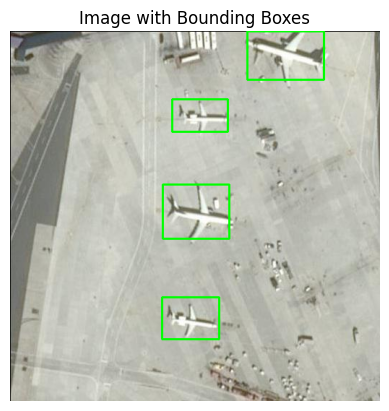

In [ ]:
def visualize_image_with_boxes(image, labels):
    for label in labels:
        class_id, x_center, y_center, width, height = map(float, label.split())
        
        # Convert normalized values to pixel values
        h, w, _ = image.shape
        x_min = int((x_center - width / 2) * w)
        y_min = int((y_center - height / 2) * h)
        x_max = int((x_center + width / 2) * w)
        y_max = int((y_center + height / 2) * h)

        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
    
    plt.imshow(image)
    plt.title("Image with Bounding Boxes")
    plt.axis("off")
    plt.show()

visualize_image_with_boxes(sample_image.copy(), labels)

### 2- Apply Preprocessing

Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)

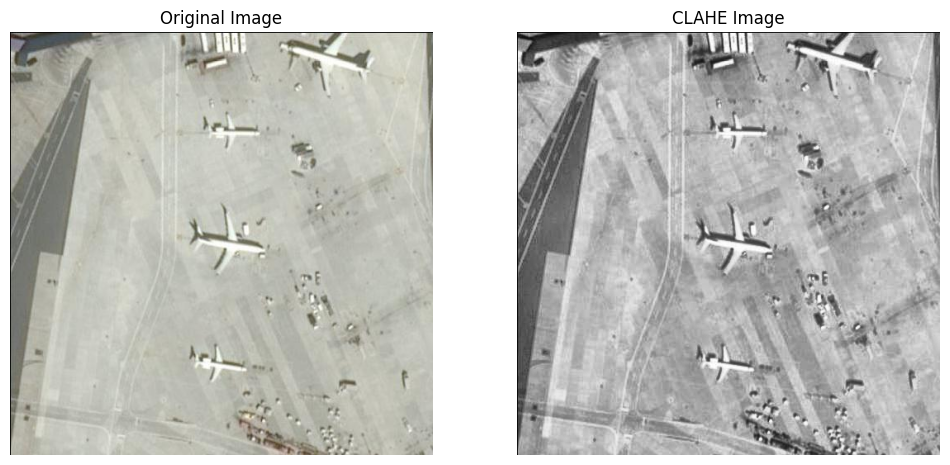

In [ ]:
def apply_clahe(image):
    # Convert image to grayscale for CLAHE 
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    
    clahe_image = clahe.apply(gray_image)

    # Convert back to RGB for visualization
    clahe_image_rgb = cv2.cvtColor(clahe_image, cv2.COLOR_GRAY2RGB)
    
    return clahe_image_rgb

clahe_image = apply_clahe(sample_image)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(clahe_image)
plt.title("CLAHE Image")
plt.axis("off")
plt.show()

Apply Sharpening Filter

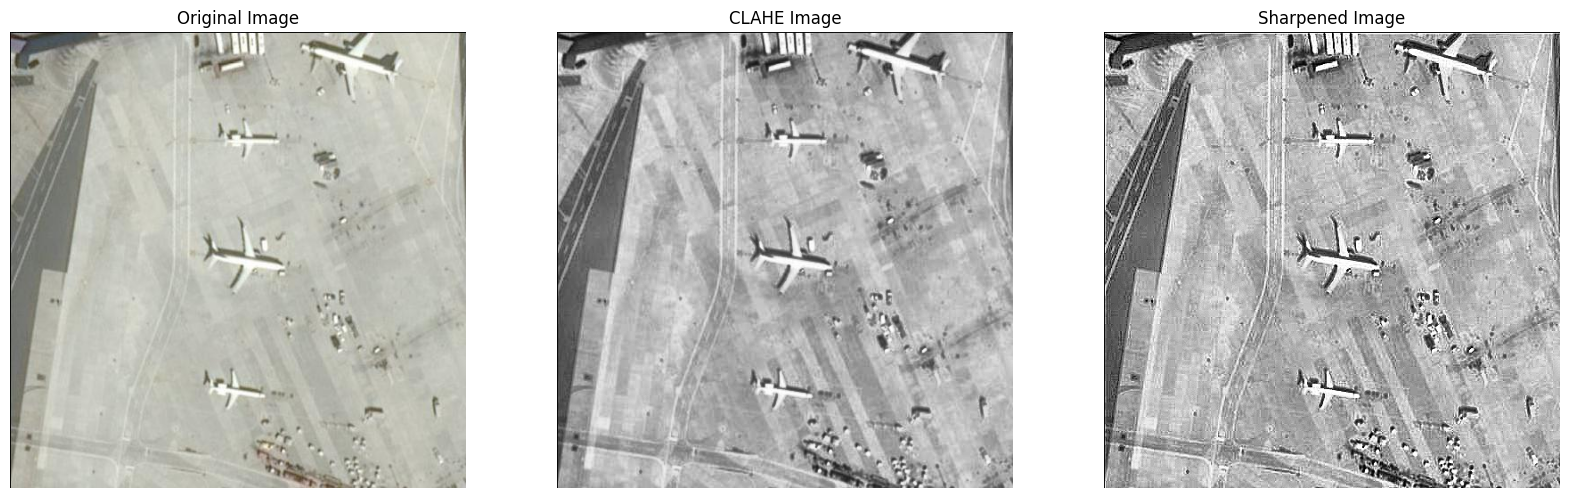

In [ ]:
def apply_sharpening(image):
    # Define the kernel for sharpening 
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])

    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image

sharpened_image = apply_sharpening(clahe_image)

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(sample_image)
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(clahe_image)
plt.title("CLAHE Image")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(sharpened_image)
plt.title("Sharpened Image")
plt.axis("off")
plt.show()

Save the Final Processed Image to use in the models

In [ ]:
processed_train_dir = r"G:\Ahmed\Datasets\processed_train_images"
processed_valid_dir = r"G:\Ahmed\Datasets\processed_valid_images"

os.makedirs(processed_train_dir, exist_ok=True)
os.makedirs(processed_valid_dir, exist_ok=True)

def process_dataset(image_dir, output_dir):
    # Get all image files 
    image_files = glob(os.path.join(image_dir, "*.jpg"))
    
    for image_file in image_files:
        image = cv2.imread(image_file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        clahe_image = apply_clahe(image)

        sharpened_image = apply_sharpening(clahe_image)

        # Save the processed image
        processed_image_path = os.path.join(output_dir, os.path.basename(image_file))
        cv2.imwrite(processed_image_path, cv2.cvtColor(sharpened_image, cv2.COLOR_RGB2BGR))

        print(f"Processed image saved to: {processed_image_path}")

    print(f"Processing complete for all images in {image_dir}.")

train_image_dir = r"G:\Ahmed\Datasets\airbus_tiles.v1i.yolov11\train\images"
valid_image_dir = r"G:\Ahmed\Datasets\airbus_tiles.v1i.yolov11\valid\images"

process_dataset(valid_image_dir, processed_valid_dir)


Processed image saved to: G:\Ahmed\Datasets\processed_valid_images\014de911-7810-4f7d-8967-3e5402209f4a_1472_1472_jpg.rf.6f1bdf144d036715350acb3a1a5da9e1.jpg
Processed image saved to: G:\Ahmed\Datasets\processed_valid_images\014de911-7810-4f7d-8967-3e5402209f4a_1472_448_jpg.rf.12e6fbcc2b976167be653a84141a69de.jpg
Processed image saved to: G:\Ahmed\Datasets\processed_valid_images\014de911-7810-4f7d-8967-3e5402209f4a_448_448_jpg.rf.6f4f048ff0c5b6a08971044accc4c2f8.jpg
Processed image saved to: G:\Ahmed\Datasets\processed_valid_images\0263270b-e3ee-41dc-aeef-43ff77e66d5b_1472_2048_jpg.rf.eb45f7b859b000cf83b48275bcda39ea.jpg
Processed image saved to: G:\Ahmed\Datasets\processed_valid_images\0263270b-e3ee-41dc-aeef-43ff77e66d5b_1984_0_jpg.rf.17ddc16cd3f46478739962d3eefb6da9.jpg
Processed image saved to: G:\Ahmed\Datasets\processed_valid_images\0263270b-e3ee-41dc-aeef-43ff77e66d5b_448_1472_jpg.rf.951d3fa3c45efdb47a5ebff0a0ba32a5.jpg
Processed image saved to: G:\Ahmed\Datasets\processed_valid

### 3- Train YOLOv8 on the proccecd dataset

In [ ]:
from ultralytics import YOLO

yaml_path = r"G:\Ahmed\Datasets\airbus_tiles.v1i.yolov11\data.yaml"

model = YOLO("yolov8n.pt")  

model.train(
    data=yaml_path,       
    epochs=50,            
    imgsz=512,            
    batch=16,             
    device=0,             
    name="airplane_detector"  
)


New https://pypi.org/project/ultralytics/8.3.39 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.48  Python-3.10.14 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=G:\Ahmed\Datasets\airbus_tiles.v1i.yolov11\data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=airplane_detector6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None

train: Scanning G:\Ahmed\Datasets\airbus_tiles.v1i.yolov11\train\labels.cache... 4129 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4129/4129 [00:00<?, ?it/s]
val: Scanning G:\Ahmed\Datasets\airbus_tiles.v1i.yolov11\valid\labels.cache... 407 images, 0 backgrounds, 0 corrupt: 100%|██████████| 407/407 [00:00<?, ?it/s]


Plotting labels to runs\detect\airplane_detector6\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\airplane_detector6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.23G      1.447      1.509      1.295          4        640: 100%|██████████| 259/259 [00:59<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.91it/s]

                   all        407       1159      0.863      0.736      0.821      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.13G      1.369      1.005      1.287         10        640: 100%|██████████| 259/259 [00:51<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.01it/s]

                   all        407       1159      0.914      0.816      0.895      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.14G      1.366      0.906      1.294          5        640: 100%|██████████| 259/259 [00:51<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.43it/s]

                   all        407       1159      0.942      0.834      0.904      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.14G      1.315      0.841      1.271          4        640: 100%|██████████| 259/259 [00:50<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.54it/s]

                   all        407       1159      0.943       0.87      0.906      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.13G      1.295     0.7959      1.263          3        640: 100%|██████████| 259/259 [00:50<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.32it/s]

                   all        407       1159      0.939      0.858      0.909      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.14G      1.258     0.7519      1.243          4        640: 100%|██████████| 259/259 [00:40<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.63it/s]

                   all        407       1159      0.934      0.849      0.902      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.14G      1.239     0.7305      1.231          3        640: 100%|██████████| 259/259 [00:49<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.62it/s]

                   all        407       1159      0.957      0.877      0.922      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.14G      1.219     0.7016      1.216          7        640: 100%|██████████| 259/259 [00:41<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.41it/s]

                   all        407       1159      0.947      0.885      0.922      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.13G      1.209     0.6844      1.216          4        640: 100%|██████████| 259/259 [00:40<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.46it/s]

                   all        407       1159      0.945       0.89      0.916       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.14G      1.189     0.6657      1.204          3        640: 100%|██████████| 259/259 [00:39<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.42it/s]

                   all        407       1159      0.948      0.902      0.923      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.15G      1.183     0.6557      1.201         11        640: 100%|██████████| 259/259 [00:50<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.28it/s]

                   all        407       1159      0.945      0.883      0.925      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.14G      1.167     0.6351      1.192          1        640: 100%|██████████| 259/259 [00:50<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.45it/s]

                   all        407       1159      0.952      0.897      0.929      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.13G      1.154     0.6205      1.192          3        640: 100%|██████████| 259/259 [00:52<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.43it/s]

                   all        407       1159      0.946      0.897      0.925      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.14G      1.153     0.6175      1.181          1        640: 100%|██████████| 259/259 [00:50<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.46it/s]

                   all        407       1159      0.972      0.877      0.929      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.14G      1.143     0.6079       1.18          1        640: 100%|██████████| 259/259 [00:50<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.26it/s]

                   all        407       1159      0.949       0.89      0.921      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.14G      1.131     0.5955      1.167          5        640: 100%|██████████| 259/259 [00:50<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.57it/s]

                   all        407       1159       0.96      0.884      0.922      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.13G      1.113     0.5901      1.162          2        640: 100%|██████████| 259/259 [00:50<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.67it/s]

                   all        407       1159      0.953      0.896      0.931       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.14G      1.112     0.5846       1.16          2        640: 100%|██████████| 259/259 [00:51<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.45it/s]

                   all        407       1159      0.955      0.894      0.923      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.14G        1.1     0.5736      1.151          3        640: 100%|██████████| 259/259 [00:50<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.38it/s]

                   all        407       1159      0.968      0.888      0.929      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.14G      1.097     0.5732      1.156          1        640: 100%|██████████| 259/259 [00:50<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.47it/s]

                   all        407       1159      0.958      0.899       0.93      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.13G      1.092     0.5679      1.152          3        640: 100%|██████████| 259/259 [00:50<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.40it/s]

                   all        407       1159       0.96      0.902      0.935      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.14G      1.084     0.5513      1.149          3        640: 100%|██████████| 259/259 [00:50<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.28it/s]

                   all        407       1159       0.94      0.913      0.928      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.14G      1.085     0.5532      1.151          6        640: 100%|██████████| 259/259 [00:50<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.46it/s]

                   all        407       1159      0.961      0.908      0.931      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.14G      1.075     0.5535      1.143          1        640: 100%|██████████| 259/259 [00:42<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.81it/s]

                   all        407       1159      0.958      0.905      0.933      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.13G      1.064     0.5371      1.135          3        640: 100%|██████████| 259/259 [00:40<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.00it/s]

                   all        407       1159      0.946      0.903      0.931      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.14G      1.055     0.5322      1.132          6        640: 100%|██████████| 259/259 [00:39<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.85it/s]

                   all        407       1159      0.951      0.911      0.937      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.14G       1.05      0.534      1.134          8        640: 100%|██████████| 259/259 [00:40<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.45it/s]

                   all        407       1159      0.953      0.906      0.933      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.14G       1.05     0.5277      1.131          2        640: 100%|██████████| 259/259 [00:50<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.65it/s]

                   all        407       1159      0.959      0.903      0.935      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.13G      1.034     0.5213      1.122          2        640: 100%|██████████| 259/259 [00:50<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.71it/s]

                   all        407       1159      0.955      0.908      0.934       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.14G      1.042     0.5217      1.125          4        640: 100%|██████████| 259/259 [00:41<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.46it/s]

                   all        407       1159      0.955      0.905      0.938      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.14G      1.029      0.515      1.119          1        640: 100%|██████████| 259/259 [00:50<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.44it/s]

                   all        407       1159      0.947      0.917      0.934       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.14G      1.023     0.5074      1.112          3        640: 100%|██████████| 259/259 [00:50<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.38it/s]

                   all        407       1159      0.949      0.918      0.934      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.13G      1.008     0.5007      1.107          4        640: 100%|██████████| 259/259 [00:50<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.40it/s]

                   all        407       1159      0.966      0.907      0.937      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.15G      1.005     0.4952       1.11          8        640: 100%|██████████| 259/259 [00:50<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.56it/s]

                   all        407       1159      0.956       0.91      0.932      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.14G      1.011     0.5012      1.109          5        640: 100%|██████████| 259/259 [00:50<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.38it/s]

                   all        407       1159      0.959      0.913      0.935      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.14G     0.9879     0.4833      1.099          5        640: 100%|██████████| 259/259 [00:50<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.27it/s]

                   all        407       1159      0.953      0.917      0.935      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.13G     0.9908     0.4869      1.099          8        640: 100%|██████████| 259/259 [00:50<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.52it/s]

                   all        407       1159      0.959      0.908      0.933      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.14G     0.9774     0.4787      1.092         21        640: 100%|██████████| 259/259 [00:50<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.46it/s]

                   all        407       1159      0.962      0.906      0.936      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.14G     0.9697     0.4746      1.088          1        640: 100%|██████████| 259/259 [00:50<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.38it/s]

                   all        407       1159      0.945      0.923      0.934      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.14G     0.9754     0.4772      1.089          3        640: 100%|██████████| 259/259 [00:50<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.30it/s]

                   all        407       1159      0.967      0.902      0.939      0.709


Closing dataloader mosaic


In [ ]:
from ultralytics import YOLO

yaml_path = r"G:\Ahmed\Datasets\airbus_tiles.v1i.yolov11\data.yaml"
weights_path = r"G:\Ahmed\Datasets\best.pt"

model = YOLO(weights_path)  
model.train(
    data=yaml_path,       
    epochs=5,            
    imgsz=640,            
    batch=8,             
    device=0,             
    name="airplane_detector"
)

New https://pypi.org/project/ultralytics/8.3.39 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.48  Python-3.10.14 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=C:\Users\moham\OneDrive\ \runs\detect\airplane_detector6\weights\best.pt, data=G:\Ahmed\Datasets\airbus_tiles.v1i.yolov11\data.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=airplane_detector9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visu

train: Scanning G:\Ahmed\Datasets\airbus_tiles.v1i.yolov11\train\labels.cache... 4129 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4129/4129 [00:00<?, ?it/s]
val: Scanning G:\Ahmed\Datasets\airbus_tiles.v1i.yolov11\valid\labels.cache... 407 images, 0 backgrounds, 0 corrupt: 100%|██████████| 407/407 [00:00<?, ?it/s]


Plotting labels to runs\detect\airplane_detector9\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\airplane_detector9
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      1.25G     0.9749     0.4836      1.095          6        640: 100%|██████████| 517/517 [00:52<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  8.63it/s]

                   all        407       1159      0.959      0.905      0.929      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      1.35G      1.014     0.5123      1.112          9        640: 100%|██████████| 517/517 [00:45<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.64it/s]

                   all        407       1159      0.963      0.911      0.934      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      1.35G       1.03     0.5231      1.124          6        640: 100%|██████████| 517/517 [00:45<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.82it/s]

                   all        407       1159      0.955      0.906      0.937      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      1.34G       1.01     0.5101      1.112          6        640: 100%|██████████| 517/517 [00:41<00:00, 12.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 10.84it/s]

                   all        407       1159      0.966      0.904      0.934       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      1.35G     0.9786     0.4873      1.095          3        640: 100%|██████████| 517/517 [00:44<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.56it/s]

                   all        407       1159      0.958      0.917      0.937      0.702



5 epochs completed in 0.068 hours.
Optimizer stripped from runs\detect\airplane_detector9\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\airplane_detector9\weights\best.pt, 6.2MB

Validating runs\detect\airplane_detector9\weights\best.pt...
Ultralytics YOLOv8.2.48  Python-3.10.14 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00,  9.78it/s]


                   all        407       1159      0.958      0.917      0.937      0.702
Speed: 0.3ms preprocess, 1.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\detect\airplane_detector9


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001C77FCE7070>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

train results{ precision: 0.96, recall: 0.92, mAP50: 0.94, mAP50-95: 0.70 }

Apply the model on test set

In [ ]:
import os

test_image_folder = r"G:\Ahmed\Datasets\airbus_tiles.v1i.yolov11\test\images"

image_files = [os.path.join(test_image_folder, f) for f in os.listdir(test_image_folder) if f.endswith(('.jpg'))]

results = model.predict(source=test_image_folder, save=True, imgsz=512)

output_dir = results[0].save_dir if results else "No results"
print("Predictions saved in:", output_dir)



image 1/195 G:\Ahmed\Datasets\airbus_tiles.v1i.yolov11\test\images\014de911-7810-4f7d-8967-3e5402209f4a_1472_2048_jpg.rf.63b65e08f70c26d0c394050d02dd8c13.jpg: 640x640 2 airplanes, 63.3ms
image 2/195 G:\Ahmed\Datasets\airbus_tiles.v1i.yolov11\test\images\014de911-7810-4f7d-8967-3e5402209f4a_2048_0_jpg.rf.f9d9d5d4b6c447a4ec171456aec04821.jpg: 640x640 5 airplanes, 14.2ms
image 3/195 G:\Ahmed\Datasets\airbus_tiles.v1i.yolov11\test\images\0263270b-e3ee-41dc-aeef-43ff77e66d5b_1472_1472_jpg.rf.ae38df60b88d41df7f506895192cf27a.jpg: 640x640 1 airplane, 9.2ms
image 4/195 G:\Ahmed\Datasets\airbus_tiles.v1i.yolov11\test\images\0263270b-e3ee-41dc-aeef-43ff77e66d5b_1472_448_jpg.rf.d35027a51a84340c3a4a2a3a64454390.jpg: 640x640 1 airplane, 9.1ms
image 5/195 G:\Ahmed\Datasets\airbus_tiles.v1i.yolov11\test\images\0263270b-e3ee-41dc-aeef-43ff77e66d5b_1984_448_jpg.rf.8a543f5c60b1a166dc17911a90ceb469.jpg: 640x640 1 airplane, 7.3ms
image 6/195 G:\Ahmed\Datasets\airbus_tiles.v1i.yolov11\test\images\0263270b

### 4- Aplecation to Cairo Airport image

In [ ]:
from ultralytics import YOLO

model_weights = r"G:\Ahmed\Datasets\best.pt"
image_path = r"G:\Ahmed\Datasets\Cairo_Airport\RawImage.jpg"
output_path = r"G:\Ahmed\Datasets\Cairo_Airport\outputImage.jpg"

model = YOLO(model_weights)

image = cv2.imread(image_path)

slice_height = 1024
slice_width = 1024

Function to perform inference on each slice

In [ ]:
def detect_in_slices(image, slice_height, slice_width):
    height, width, _ = image.shape
    detections = []

    for y in range(0, height, slice_height):
        for x in range(0, width, slice_width):
            # Define slice coordinates
            slice_img = image[y:y+slice_height, x:x+slice_width]

            results = model(slice_img)

            # Append results with the top-left coordinates (x, y)
            detections.append((results, x, y))

    return detections
detections = detect_in_slices(image, slice_height, slice_width)

Draw the Bounding Box in the full image

In [ ]:
mask = np.zeros_like(image, dtype=np.uint8)
for result, offset_x, offset_y in detections:
    for detection in result[0].boxes:
        # Extract the bounding box coordinates
        x1, y1, x2, y2 = map(int, detection.xyxy[0])  
        conf = detection.conf[0].item()

        # Adjust the coordinates for the full image
        x1 += offset_x
        y1 += offset_y
        x2 += offset_x
        y2 += offset_y
       
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        mask[y1:y2, x1:x2] = (0, 255, 0)

Save the output image

In [ ]:
# Blend the original image with the mask
colored_image = cv2.addWeighted(image, 0.7, mask, 0.3, 0)

cv2.imwrite(output_path, colored_image)

print(f"Detection complete! Image saved to: {output_path}")



0: 640x640 (no detections), 83.7ms
Speed: 9.5ms preprocess, 83.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 0.0ms
Speed: 0.0ms preprocess, 0.0ms inference, 11.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.0ms
Speed: 3.7ms preprocess, 8.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 6.2ms
Speed: 4.6ms preprocess, 6.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.9ms
Speed: 0.9ms preprocess, 9.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 10.7ms
Speed: 1.5ms preprocess, 10.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 6.6ms
Speed: 3.2ms preprocess, 6.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.2ms
Speed: 7.1ms preprocess, 7.2ms inference, 1

### <span style="color: Yellow;">Written by Eng.Ahmed Ashraf</span>
